# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Features linguistiques

---

# Observations et environnement
---

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=0, releaselevel='final', serial=0)

In [2]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [3]:
import importlib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [4]:
random_state = 42

## Données d'entrainement

In [5]:
df_text = pd.read_csv('data/demo/221123-TextInfox.csv')

In [83]:
df_text['char_count']=df_text['text'].apply(len)

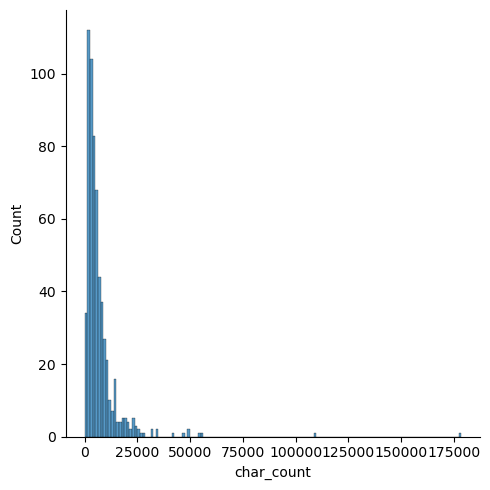

In [84]:
sns.displot(df_text,x='char_count')

In [86]:
# Suppression des articles de plus de 30_000 char
df_text = df_text[df_text['char_count']<30_000]

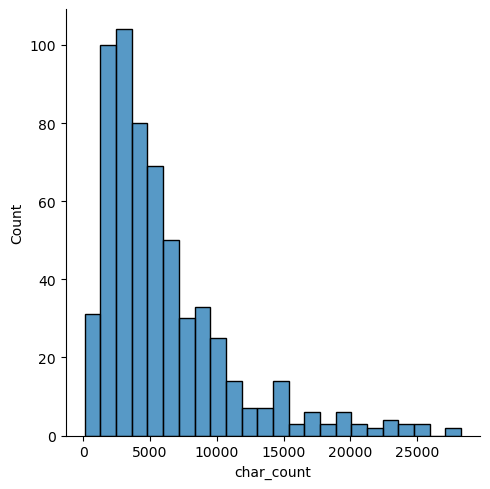

In [87]:
sns.displot(df_text,x='char_count')

In [98]:
df_text = df_text.reset_index()

# Experience
---


## Préparation

In [99]:
import spacy

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
import patat.ml.lex_analyser

In [102]:
lex = patat.ml.lex_analyser.LexAnalyser()

## Travail sur texte brut

In [103]:
vectorizer = CountVectorizer()

In [104]:
count_matrix = vectorizer.fit_transform(df_text['text'])

In [105]:
count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())

In [106]:
df_count

,00,000,0001,0002,001,0024320568900684,003,009,00h00,01,...,神秘小屋,纷纷跳过门口闸门跑开,自由亚洲电台,闭环生产,防疫太严,集体冲出封锁线与警卫发生冲突,𝗚𝘂𝗲𝗿𝗿𝗲,𝗨𝗸𝗿𝗮𝗶𝗻𝗲,𝗱𝗶𝗿𝗲𝗰𝘁,𝗲𝗻
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_words_0 = pd.DataFrame(df_count[df_text['infox']==0.0].sum(),columns=['count_0']).sort_values('count_0',ascending=False)
df_words_1 = pd.DataFrame(df_count[df_text['infox']==1.0].sum(),columns=['count_1']).sort_values('count_1',ascending=False)
df_words = pd.concat([df_words_0,df_words_1],axis=1).fillna(0)
df_words['count']=df_words['count_0']+df_words['count_1']
df_words.shape

(37047, 3)

In [108]:
df_words.loc['en']

count_0    3551
count_1    4788
count      8339
Name: en, dtype: int64

## Avec Preprocessing

In [109]:
from patat.util.text import preprocess

In [110]:
df_text['text_p']=df_text['text'].apply(preprocess)

In [111]:
vectorizer = CountVectorizer(token_pattern=r'\w\w+')

count_matrix = vectorizer.fit_transform(df_text['text_p'])

count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())

In [112]:
df_count

,00,000,0001,0002,001,0024320568900684,003,009,00h00,01,...,être,êtres,île,îles,îlots,ïle,östlund,özdemir,özgür,þórólfur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0


In [113]:
df_words_0 = pd.DataFrame(df_count[df_text['infox']==0.0].sum(),columns=['count_0']).sort_values('count_0',ascending=False)
df_words_1 = pd.DataFrame(df_count[df_text['infox']==1.0].sum(),columns=['count_1']).sort_values('count_1',ascending=False)
df_words = pd.concat([df_words_0,df_words_1],axis=1).fillna(0)
df_words['count']=df_words['count_0']+df_words['count_1']
df_words.shape

(36958, 3)

In [114]:
df_words

,count_0,count_1,count
de,13198,17863,31061
la,7660,9648,17308
le,5589,7672,13261
et,5002,7573,12575
les,4945,7958,12903
...,...,...,...
pings,0,1,1
pink,0,1,1
pinker,0,1,1
piocher,0,1,1


## Lex preprocessor + tokenizer + lemmes

In [139]:
vectorizer = CountVectorizer(preprocessor=lex.preprocess, tokenizer=lex.get_lemmas_from_text)
count_matrix = vectorizer.fit_transform(df_text['text_p'])
count_array = count_matrix.toarray()
df_count = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [140]:
df_words_0 = pd.DataFrame(df_count[df_text['infox']==0.0].sum(),columns=['count_0']).sort_values('count_0',ascending=False)
df_words_1 = pd.DataFrame(df_count[df_text['infox']==1.0].sum(),columns=['count_1']).sort_values('count_1',ascending=False)
df_words = pd.concat([df_words_0,df_words_1],axis=1).fillna(0)
df_words['count']=df_words['count_0']+df_words['count_1']
df_words.shape

(23965, 3)

In [141]:
df_doc_0 = pd.DataFrame(df_count[df_text['infox']==0.0].astype(bool).sum(),columns=['doc_0']).sort_values('doc_0',ascending=False)
df_doc_1 = pd.DataFrame(df_count[df_text['infox']==1.0].astype(bool).sum(),columns=['doc_1']).sort_values('doc_1',ascending=False)
df_words = pd.concat([df_words,df_doc_0,df_doc_1],axis=1).fillna(0)
df_words.shape

(23965, 5)

In [142]:
df_words

,count_0,count_1,count,doc_0,doc_1
de,13198,17864,31062,311,287
la,7660,9649,17309,311,286
le,5592,7681,13273,310,285
et,5003,7576,12579,308,285
les,4945,7968,12913,310,284
...,...,...,...,...,...
enivrer,0,1,1,0,1
enhancement,0,2,2,0,2
enhanced,0,3,3,0,2
poignard,0,1,1,0,1


## Mots courants

In [143]:
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))

In [144]:
df_words['freq_1']=df_words['count_1']/df_words['count']

In [149]:
df_words[~df_words['common_80']].sort_values(['freq_1','doc_1','count_1'],ascending=False)

,count_0,count_1,count,doc_0,doc_1,common_50,common_80,common_120,common_200,common_500,freq_1
nih,0,55,55,0,14,False,False,False,False,False,1.0
allégation,0,17,17,0,12,False,False,False,False,False,1.0
group,0,16,16,0,12,False,False,False,False,False,1.0
hunter,0,92,92,0,11,False,False,False,False,False,1.0
human,0,18,18,0,11,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
default,1,0,1,1,0,False,False,False,False,False,0.0
impeachment,1,0,1,1,0,False,False,False,False,False,0.0
illibéralisme,1,0,1,1,0,False,False,False,False,False,0.0
artificialité,1,0,1,1,0,False,False,False,False,False,0.0


# Sauvegarde des résultats
---

# Conclusions
---
- Création de features linguistiques

# Bricolages
---

In [138]:
df_count[df_text['infox']==0.0].astype(bool).sum()

aa           1
aae          0
aarmement    0
aaron        1
aasland      1
            ..
ïle          0
östlund      1
özdemir      0
özgür        0
þórólfur     0
Length: 23965, dtype: int64

- 